In [1]:
#Cargamos librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score

In [ ]:
#Cargar archivo csv desde equipo
from google.colab import files
files.upload()

In [ ]:
df = pd.read_excel('BaseLimpia.xlsx')
df

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   folio               22735 non-null  int64         
 1   folio_solicitud     22735 non-null  int64         
 2   precio              22735 non-null  float64       
 3   enganche            22735 non-null  float64       
 4   descuento           22735 non-null  float64       
 5   monto_accesorios    22735 non-null  float64       
 6   status              22735 non-null  int64         
 7   fraude              22735 non-null  int64         
 8   inversion           22735 non-null  int64         
 9   pagos_realizados    22735 non-null  int64         
 10  reautorizacion      22735 non-null  int64         
 11  puntos              22735 non-null  int64         
 12  riesgo              22735 non-null  float64       
 13  score_buro          22735 non-null  int64     

In [27]:
#Graficamos todas las dispersiones entre todas las variables
sns.pairplot(df)

Output hidden; open in https://colab.research.google.com to view.

In [9]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['costo_total']]
Var_Dep= df['porc_eng']

In [10]:
#Redefinimos las variables
x= Vars_Indep
y= Var_Dep

** Usamos las siguientes ecuaciones como funciones de ajuste.**

        y = ax^2 + bx + c


        y = a*exp(bx) + c

Modelo 1

In [11]:
def  func1 (x, a, b, c):
     return a*x**2 + b*x + c

In [13]:
#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, df['costo_total'], df['porc_eng'])

In [14]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

array([ 1.51221420e-07, -2.95737669e-03,  3.42967949e+01])

In [15]:
#Creamos el modelo de predicción con los parámetros obtenidos
parametros, _ = curve_fit(func1, df['costo_total'], df['porc_eng'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a * x ** 2 + b * x + c

In [ ]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
#x= x.reshape(51, 1)
#y = y.reshape(51, 1)
#yfit1 = yfit1.reshape(51, 1)
yfit1

In [ ]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [19]:
#Calculamos el coeficiente de determinación del modelo

R2 = r2_score(y, yfit1)
R2

0.10276916682380188

MODELO 2

In [52]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['score_buro']]
Var_Dep= df['porc_eng']

In [53]:
#Redefinimos las variables
x= Vars_Indep
y= Var_Dep

In [54]:
def  func1 (x, a, b, c):
     return a*x**2 + b*x + c

In [55]:
#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, df['score_buro'], df['porc_eng'])

In [57]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

array([-7.34501727e-05,  4.38669088e-02,  2.25877451e+01])

In [58]:
#Creamos el modelo de predicción con los parámetros obtenidos
parametros, _ = curve_fit(func1, df['score_buro'], df['porc_eng'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a * x ** 2 + b * x + c

In [59]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
#x= x.reshape(51, 1)
#y = y.reshape(51, 1)
#yfit1 = yfit1.reshape(51, 1)
yfit1

,score_buro
0,22.587745
1,22.587745
2,22.587745
3,22.587745
4,22.587745
...,...
22730,27.005152
22731,26.099196
22732,27.248100
22733,17.362886


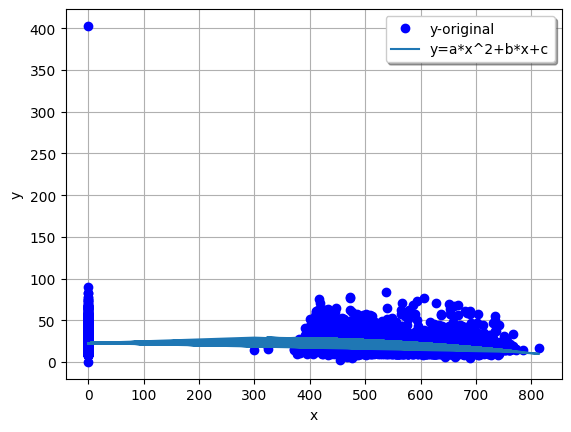

In [60]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [61]:
#Calculamos el coeficiente de determinación del modelo

R2 = r2_score(y, yfit1)
R2

0.11339193812616699

Modelo 3

In [26]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['enganche']]
Var_Dep= df['porc_eng']

In [27]:
#Redefinimos las variables
x= Vars_Indep
y= Var_Dep

In [28]:
def  func1 (x, a, b, c):
     return a*x**2 + b*x + c

In [ ]:
#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, df['enganche'], df['porc_eng'])

In [31]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

array([3.43281715e-07, 9.06565088e-03, 1.44356633e+01])

In [32]:
#Creamos el modelo de predicción con los parámetros obtenidos
parametros, _ = curve_fit(func1, df['enganche'], df['porc_eng'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a * x ** 2 + b * x + c

In [33]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
#x= x.reshape(51, 1)
#y = y.reshape(51, 1)
#yfit1 = yfit1.reshape(51, 1)
yfit1

,enganche
0,21.715724
1,24.333065
2,18.960254
3,18.960254
4,24.577943
...,...
22730,17.158442
22731,25.897804
22732,25.334864
22733,42.499827


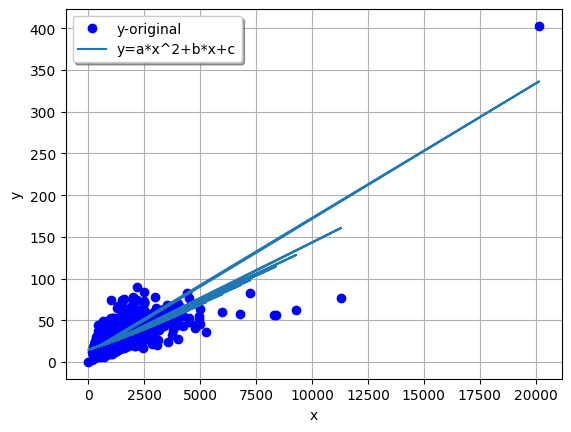

In [34]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [35]:
#Calculamos el coeficiente de determinación del modelo

R2 = r2_score(y, yfit1)
R2

0.4698421182128987

Modelo 4


In [36]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['riesgo']]
Var_Dep= df['porc_eng']

In [37]:
#Redefinimos las variables
x= Vars_Indep
y= Var_Dep

In [38]:
def  func1 (x, a, b, c):
     return a*x**2 + b*x + c

In [39]:
#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, df['riesgo'], df['porc_eng'])

In [ ]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

In [41]:
#Creamos el modelo de predicción con los parámetros obtenidos
parametros, _ = curve_fit(func1, df['riesgo'], df['porc_eng'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a * x ** 2 + b * x + c

In [ ]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
#x= x.reshape(51, 1)
#y = y.reshape(51, 1)
#yfit1 = yfit1.reshape(51, 1)
yfit1

In [ ]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [44]:
#Calculamos el coeficiente de determinación del modelo

R2 = r2_score(y, yfit1)
R2

0.22480743303938167

Modelo 5

In [62]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['puntos']]
Var_Dep= df['porc_eng']

In [63]:
#Redefinimos las variables
x= Vars_Indep
y= Var_Dep

In [64]:
def  func1 (x, a, b, c):
     return a*x**2 + b*x + c

In [65]:
#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, df['puntos'], df['porc_eng'])

In [66]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

array([-4.00764587e-04, -2.17412907e-01,  2.64173207e+01])

In [67]:
#Creamos el modelo de predicción con los parámetros obtenidos
parametros, _ = curve_fit(func1, df['puntos'], df['porc_eng'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a * x ** 2 + b * x + c

In [68]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
#x= x.reshape(51, 1)
#y = y.reshape(51, 1)
#yfit1 = yfit1.reshape(51, 1)
yfit1

,puntos
0,26.417321
1,26.417321
2,26.417321
3,26.417321
4,26.417321
...,...
22730,24.203115
22731,24.428143
22732,23.977286
22733,23.294990


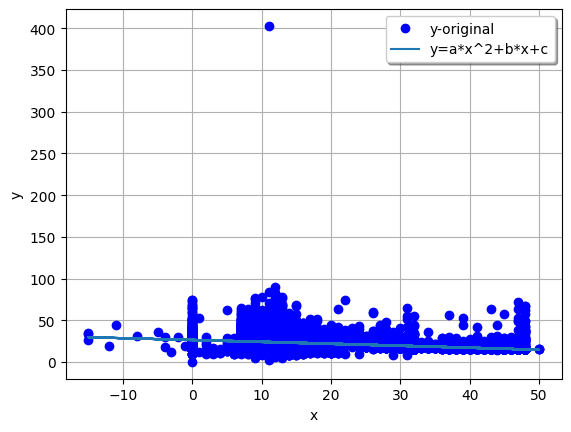

In [69]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [70]:
#Calculamos el coeficiente de determinación del modelo

R2 = r2_score(y, yfit1)
R2

0.1282280722293987